Dataset: Titanic.
This dataset includes 1313 rows, recording whether a Titanic passenger survives or not.

1. Split the dataset into training set and test set (80, 20).
2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predictions for your data.

In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,roc_curve,classification_report,precision_recall_curve

# Set a random seed
random.seed(42)

# Load the dataset
titanic = 'titanic.csv'
train_all = pd.read_csv(titanic)
# Show selected columns
is_survived = train_all['Survived']
features_raw = train_all.drop('Survived', axis = 1)
features = pd.get_dummies(features_raw)
features = features.fillna(0.0)

# Use scikit-learn’s DecisionTreeClassifier to train a supervised learning model
X_train, X_test, y_train, y_test = train_test_split(features, is_survived, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model.fit(X_train,y_train)
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Accuracy:  0.8022813688212928
Precision:  0.7945205479452054
Recall:  0.6105263157894737
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       168
           1       0.79      0.61      0.69        95

    accuracy                           0.80       263
   macro avg       0.80      0.76      0.77       263
weighted avg       0.80      0.80      0.80       263

Confusion matrix:  [[153  15]
 [ 37  58]]


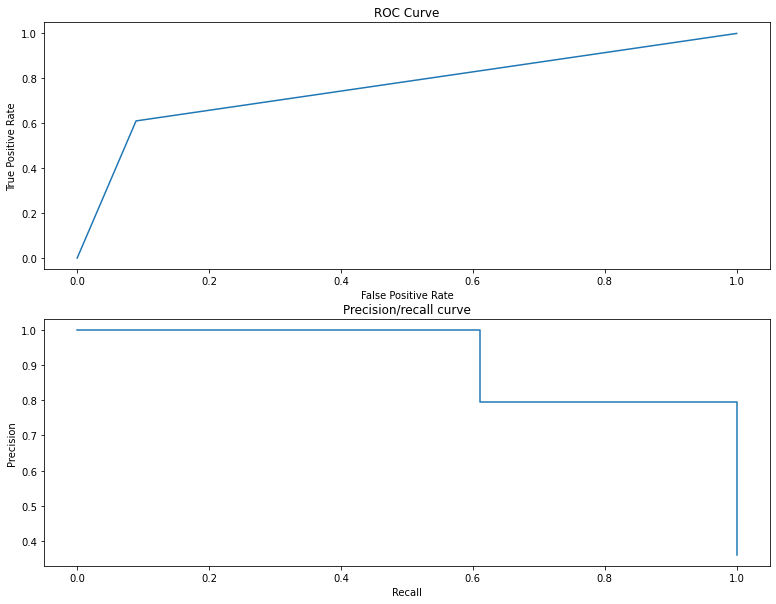

In [2]:
# detailed evaluation report listing the metrics listed below
# 1. The accuracy of your model on the test data
# 2. The precision and recall values
# 3. A classification report (scikit-learn has a function that can create this for you)
# 4. The confusion matrix for this experiment
# 5. An ROC curve
# 6. A Precision/Recall curve

import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
confusion = confusion_matrix(y_test, y_test_pred)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('Classification report:\n', report)
print('Confusion matrix: ', confusion)

# ROC curve and Precision/Recall curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
pre, rec, thresholds = precision_recall_curve(y_test, y_test_pred)

plt.figure(figsize = (13, 10))
plt.subplot(2,1,1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(2,1,2)
plt.step(rec, pre)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/recall curve')
plt.show()

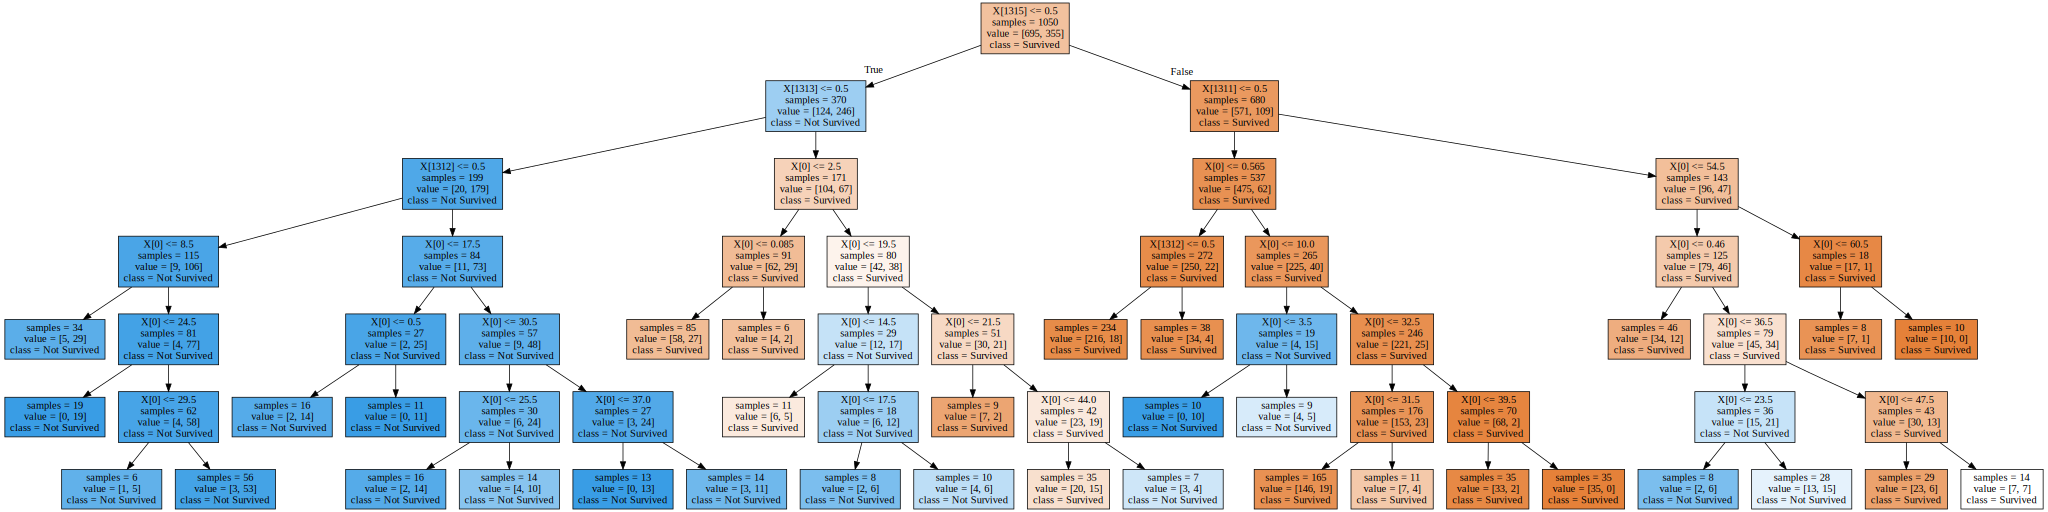

In [3]:
from graphviz import Source
import graphviz
from IPython.display import display,SVG

graph = Source(tree.export_graphviz(model, out_file=None, class_names=['Survived','Not Survived'], impurity=False, filled=True))
graph

3. Similarly as in previous step, train another Decision Tree Classifier - but in this case set the maximum depth of the tree to 1 (max_depth = 1). Use the same training and test set as you used for the Decision Tree in the previous step.

Tree with the maximum depth equal to 1

In [4]:
# Use scikit-learn’s DecisionTreeClassifier to train a supervised learning model
model1 = DecisionTreeClassifier(max_depth=1, min_samples_leaf=6, min_samples_split=10)
model1.fit(X_train,y_train)
# Making predictions
y_test_pred1 = model1.predict(X_test)

Accuracy:  0.7604562737642585
Precision:  0.6739130434782609
Recall:  0.6526315789473685
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.67      0.65      0.66        95

    accuracy                           0.76       263
   macro avg       0.74      0.74      0.74       263
weighted avg       0.76      0.76      0.76       263

Confusion matrix:  [[138  30]
 [ 33  62]]


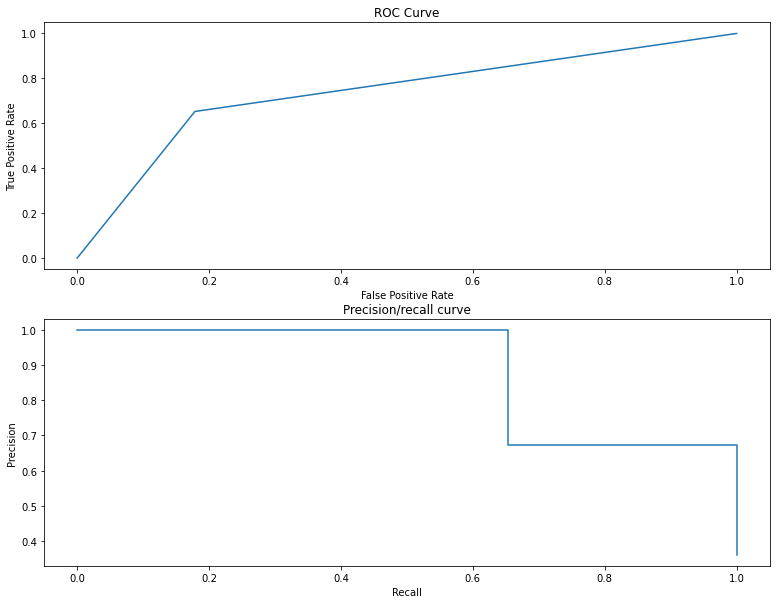

In [5]:
# detailed evaluation report listing the metrics listed below
# 1. The accuracy of your model on the test data
# 2. The precision and recall values
# 3. A classification report (scikit-learn has a function that can create this for you)
# 4. The confusion matrix for this experiment
# 5. An ROC curve
# 6. A Precision/Recall curve

accuracy1 = accuracy_score(y_test, y_test_pred1)
precision1 = precision_score(y_test, y_test_pred1)
recall1 = recall_score(y_test, y_test_pred1)
report1 = classification_report(y_test, y_test_pred1)
confusion1 = confusion_matrix(y_test, y_test_pred1)
print('Accuracy: ', accuracy1)
print('Precision: ', precision1)
print('Recall: ', recall1)
print('Classification report:\n', report1)
print('Confusion matrix: ', confusion1)


# ROC curve and Precision/Recall curve
fpr1, tpr1, _ = roc_curve(y_test, y_test_pred1)
pre1, rec1, thresholds1 = precision_recall_curve(y_test, y_test_pred1)

plt.figure(figsize = (13, 10))
plt.subplot(2,1,1)
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(2,1,2)
plt.step(rec1, pre1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/recall curve')
plt.show()

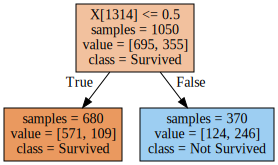

In [6]:
graph = Source(tree.export_graphviz(model1, out_file=None, class_names=['Survived','Not Survived'], impurity=False,filled=True))
graph

4. Report on the six evaluation metrics listed in objective for both the models, and compare their results.

    From the six evaluation metrics listed above, we can see that the accuracy, the precision and recall values of another decision tree whose maximum depth is 1 are lower than that of the general decision tree. Besides, regarding the number of correct predictions in the confusion matrix, the general decision tree performs better than the decision tree with maximum depth equal to 1. And the area of the general decision tree's ROC curve is also better. Thus, the general decision tree has a better prediction result than the decision tree with maximum depth equal to 1.